# What drives the price of a car?

![](https://github.com/raudhrafn/AI-ML-Projects/blob/main/car_price_analysis/images/kurt.jpeg?raw=1)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

Our goal here is to predict the price of used cars. This is a regression problem since we're trying to predict actual dollar amounts (the **target variable**) based on different car characteristics (the **features** or **predictor variables**).

We'll dig into the data with some **exploratory data analysis** to see what's going on, then build **predictive models** to understand which car attributes - like make, model, year, mileage, condition, etc. - actually matter for pricing. The models will help us figure out which features have the biggest impact on price through **feature importance analysis**.

Once we run the analysis and look at things like **model coefficients** and **feature importance scores**, we can tell the dealership what car features customers actually care about and are willing to pay for. This way, they'll know what kind of inventory to buy, how to price their cars, and what to highlight when talking to customers.

The whole process involves cleaning up the data, tweaking the features, testing different models, and then translating what we find back into practical business advice.

Some features we might consider core value drivers might include:
*   Year - Age of the vehicle
*   Odometer - Mileage
*   Manufacturer - Brand reputation and reliability
*   Model - Specific car model popularity and desirability
*   Condition - Vehicle condition rating (excellent, good, fair, etc.)

We might also consider additional features as we explore the data.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

Some steps we might consider taking to get a better understanding of the data include:
* Check dataset shape, columns, data types
* Review sample data with head() and tail()
* Generate summary statistics for numerical features
* Count unique values in categorical variables
* Analyze price distribution and ranges
* Examine correlations between features and price
* Compare average prices across categories (brand, condition, etc.)
* Determine strongest price predictors

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [4]:
# read in csv
df = pd.read_csv('/content/drive/MyDrive/Module 11/data/vehicles.csv')

In [5]:
# check df shape
df.shape

(426880, 18)

In [6]:
# basic info on df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [7]:
# quick sample
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [8]:
# describe numerical values
num_cols = df.select_dtypes(include=[np.number]).columns
print(df[num_cols].describe())

                 id         price           year      odometer
count  4.268800e+05  4.268800e+05  425675.000000  4.224800e+05
mean   7.311487e+09  7.519903e+04    2011.235191  9.804333e+04
std    4.473170e+06  1.218228e+07       9.452120  2.138815e+05
min    7.207408e+09  0.000000e+00    1900.000000  0.000000e+00
25%    7.308143e+09  5.900000e+03    2008.000000  3.770400e+04
50%    7.312621e+09  1.395000e+04    2013.000000  8.554800e+04
75%    7.315254e+09  2.648575e+04    2017.000000  1.335425e+05
max    7.317101e+09  3.736929e+09    2022.000000  1.000000e+07


In [9]:
# check for duplicates
df.duplicated().sum()

np.int64(0)

In [10]:
# check unique count in each col
df.nunique()

,0
id,426880
region,404
price,15655
year,114
manufacturer,42
model,29649
condition,6
cylinders,8
fuel,5
odometer,104870


In [ ]:
# let's grab the categorical values in a list to get a better sense of things
cat_cols = df.select_dtypes(include='object').columns.tolist()
for col in cat_cols:
  print(f'{col}: {df[col].value_counts()}')
  print('---')

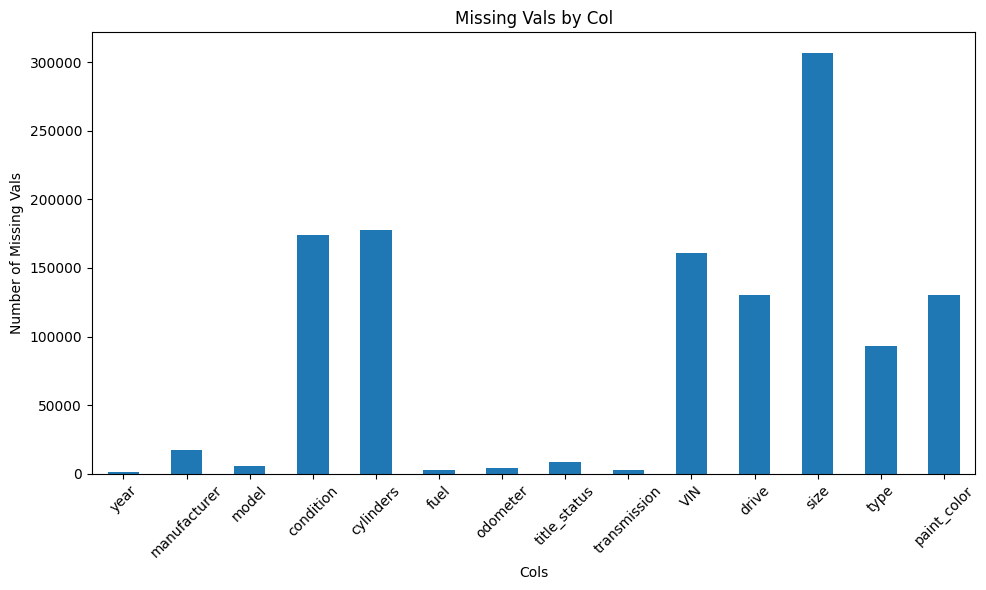

Missing vals:
year: 1,205 (0.3%)
manufacturer: 17,646 (4.1%)
model: 5,277 (1.2%)
condition: 174,104 (40.8%)
cylinders: 177,678 (41.6%)
fuel: 3,013 (0.7%)
odometer: 4,400 (1.0%)
title_status: 8,242 (1.9%)
transmission: 2,556 (0.6%)
VIN: 161,042 (37.7%)
drive: 130,567 (30.6%)
size: 306,361 (71.8%)
type: 92,858 (21.8%)
paint_color: 130,203 (30.5%)


In [12]:
# guessing we have a lot of missing values, so we'll take a look
missing = df.isnull().sum()
missing = missing[missing > 0]

plt.figure(figsize=(10, 6))
missing.plot(kind='bar')
plt.title('Missing Vals by Col')
plt.xlabel('Cols')
plt.ylabel('Number of Missing Vals')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Missing vals:")
for col, count in missing.items():
    percent = (count / len(df)) * 100
    print(f"{col}: {count:,} ({percent:.1f}%)")

Looks like we're missing quite a bit from condition, cylinders, VIN, drive, type and paint_color; size is our clear outlier here though, with 71% values missing.

In [13]:
# let's get a closer look at the price
print(df['price'].describe())
print(f"\nPrice Range: ${df['price'].min():,.2f} - ${df['price'].max():,.2f}")
print(f"Price IQR: ${df['price'].quantile(0.25):,.2f} - ${df['price'].quantile(0.75):,.2f}")

count    4.268800e+05
mean     7.519903e+04
std      1.218228e+07
min      0.000000e+00
25%      5.900000e+03
50%      1.395000e+04
75%      2.648575e+04
max      3.736929e+09
Name: price, dtype: float64

Price Range: $0.00 - $3,736,928,711.00
Price IQR: $5,900.00 - $26,485.75


In [14]:
# looks like there are some large outliers, let's see how many using IQR
def get_iqr_outliers(df, columns):
    outliers = pd.DataFrame()

    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        col_outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers = pd.concat([outliers, col_outliers]).drop_duplicates()

        print(f"{col}: {len(col_outliers)} outliers ({len(col_outliers)/len(df)*100:.1f}%)")

    return outliers

outliers = get_iqr_outliers(df, num_cols)
print(f"\nTotal unique outlier rows: {len(outliers)}")

id: 44 outliers (0.0%)
price: 8177 outliers (1.9%)
year: 15896 outliers (3.7%)
odometer: 4385 outliers (1.0%)

Total unique outlier rows: 27390


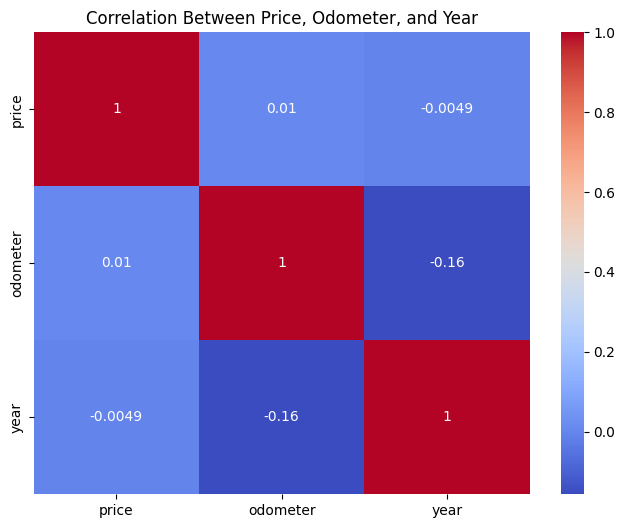

Correlations with price:
Odometer: 0.010
Year: -0.005


In [15]:
# finally, let's see a correlation heatmap between these three cols
data = df[['price', 'odometer', 'year']]

correlations = data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.title('Correlation Between Price, Odometer, and Year')
plt.show()

print("Correlations with price:")
print(f"Odometer: {correlations['price']['odometer']:.3f}")
print(f"Year: {correlations['price']['year']:.3f}")

The correlations between year, odometer and price are weaker than expected. This could be due to the outliers.

### Observations
* VIN col appears to have duplicates
* price and odometer show extreme range with large no of outliers
* year ranges from 1900 to 2022 with mean of 2011 and median of 2015, meaning likely a relatively modern selection
* California, Florida, Texas and New York seem to have the highest distribution of vehicles
* Ford, Chevrolet, Toyota and Honda are the most common manufacturers
* gasoline is overwhelmingly the most common fuel type
* automatic is the most common transmission type
* sedan and SUV are the most common car types

After some data cleaning, it's likely we can use the following features as predictors of value:
* year
* odometer
* manufacturer
* condition
* fuel
* transmission
* type

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

In [16]:
# Let's start by cleaning up the text columns
text_cols = df.select_dtypes(include='object').columns
for col in text_cols:
    df[col] = df[col].str.lower().str.strip()

# Let's replace zeros with NaN in numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    df[col] = df[col].replace(0, np.nan)

print("Cleaned text columns:", list(text_cols))
print("Cleaned numeric columns:", list(numeric_cols))

Cleaned text columns: ['region', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color', 'state']
Cleaned numeric columns: ['id', 'price', 'year', 'odometer']


In [17]:
# Next, we'll drop a few cols that are unlikely to be good price predictors
# VIN is full of duplicates, and I doubt anyone's really factoring in a particular VIN to the price they're willing to pay
# As we saw earlier, size has over 70% missing vals and is likely not valuable

cols_to_drop = ['VIN', 'size']
df = df.drop(columns=cols_to_drop)

In [18]:
# Let's drop the outliers we identified earlier using IQR
df.drop(outliers.index, inplace=True)

/tmp/ipython-input-19-2458000442.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['odometer'].fillna(median_odometer, inplace=True)


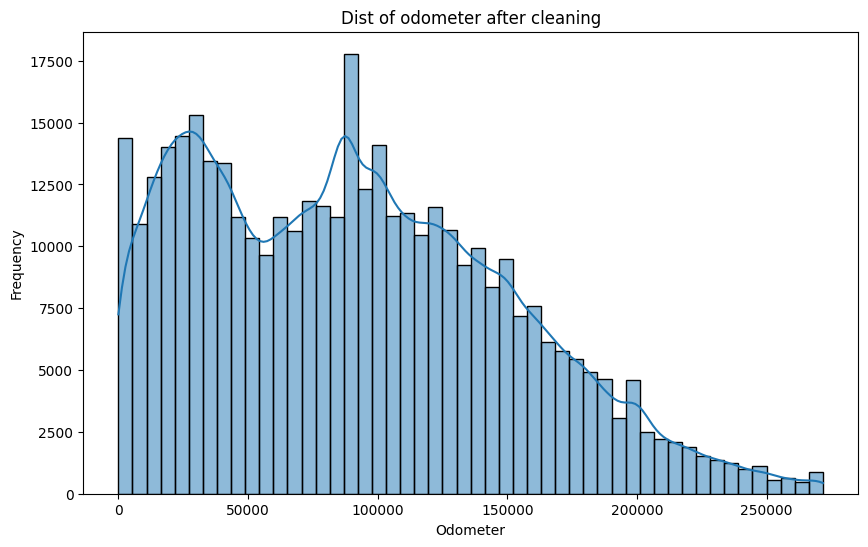

In [19]:
# Odometer was pretty messy and likely a key predictor, so now we'll impute missing odometer values with the median, then cap the upper limit to something reasonable
median_odometer = df['odometer'].median()
df['odometer'].fillna(median_odometer, inplace=True)

Q1_odometer = df['odometer'].quantile(0.25)
Q3_odometer = df['odometer'].quantile(0.75)
IQR_odometer = Q3_odometer - Q1_odometer

upper_bound_odometer = Q3_odometer + 1.5 * IQR_odometer

df['odometer'] = df['odometer'].clip(upper=upper_bound_odometer)

plt.figure(figsize=(10, 6))
sns.histplot(df['odometer'], bins=50, kde=True)
plt.title('Dist of odometer after cleaning')
plt.xlabel('Odometer')
plt.ylabel('Frequency')
plt.show()

This looks much better

In [20]:
# for year, let's also impute with the median
median_year = df['year'].median()
df['year'].fillna(median_year, inplace=True)

/tmp/ipython-input-20-470144557.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['year'].fillna(median_year, inplace=True)


In [21]:
# now we'll fill the categorical cols by imputing with the mode or 'missing' if there is no mode
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if col in df.columns and df[col].isnull().sum() > 0:
        mode_val = df[col].mode()
        if len(mode_val) > 0:
            df[col] = df[col].fillna(mode_val[0])
        else:
            df[col] = df[col].fillna('missing')
        print(f"Filled {col} missing values")

Filled manufacturer missing values
Filled model missing values
Filled condition missing values
Filled cylinders missing values
Filled fuel missing values
Filled title_status missing values
Filled transmission missing values
Filled drive missing values
Filled type missing values
Filled paint_color missing values


In [22]:
# now, since we're modeling price, let's drop any rows where price = $0

df = df[df['price'] != 0]

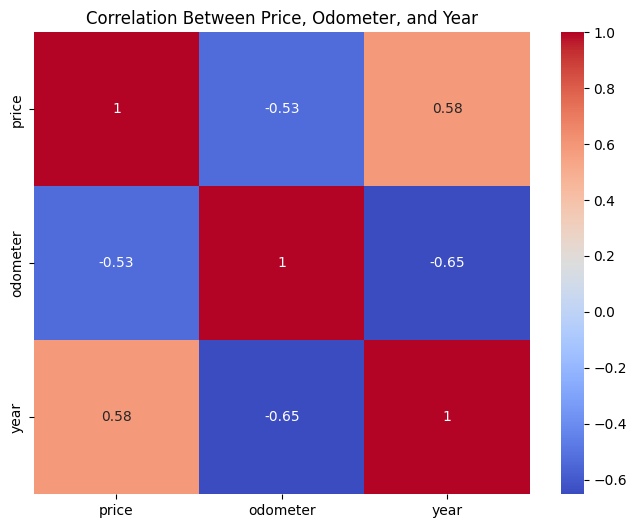

Correlations with price:
Odometer: -0.532
Year: 0.583


In [23]:
# let's look at the correlation again
data = df[['price', 'odometer', 'year']]

correlations = data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.title('Correlation Between Price, Odometer, and Year')
plt.show()

print("Correlations with price:")
print(f"Odometer: {correlations['price']['odometer']:.3f}")
print(f"Year: {correlations['price']['year']:.3f}")

This is more in line with what we might expect:
* Newer cars are more expensive
* Higher mileage = lower price
* Newer cars have fewer miles

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [24]:
# first we'll encode, split and scale the data
# ensure no NaNs in 'price' before splitting
df.dropna(subset=['price'], inplace=True)

# select features
num_features = ['year', 'odometer']
cat_features = ['manufacturer', 'condition', 'transmission', 'type']

# filter to existing columns
num_features = [col for col in num_features if col in df.columns]
cat_features = [col for col in cat_features if col in df.columns]

print(f"Numerical features: {num_features}")
print(f"Categorical features: {cat_features}")

# create feature matrix
X = df[num_features + cat_features].copy()
y = df['price'].copy()

# handle missing values
X = X.dropna()
y = y[X.index]

# encode categorical variables
X_encoded = pd.get_dummies(X, columns=cat_features, drop_first=True)

print(f"Dataset shape after encoding: {X_encoded.shape}")

# split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

# scale only numerical features using StandardScaler
scaler = StandardScaler()

# identify which columns are numerical (from original num_features)
num_cols_indices = []
for col in num_features:
    if col in X_encoded.columns:
        num_cols_indices.append(X_encoded.columns.get_loc(col))

# create copies for scaling
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# scale only the numerical columns
if num_cols_indices:
    X_train_scaled.iloc[:, num_cols_indices] = scaler.fit_transform(X_train.iloc[:, num_cols_indices])
    X_test_scaled.iloc[:, num_cols_indices] = scaler.transform(X_test.iloc[:, num_cols_indices])

print(f"Training set: {X_train_scaled.shape}")
print(f"Test set: {X_test_scaled.shape}")

Numerical features: ['year', 'odometer']
Categorical features: ['manufacturer', 'condition', 'transmission', 'type']
Dataset shape after encoding: (367138, 61)
Training set: (293710, 61)
Test set: (73428, 61)


In [25]:
# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(max_iter=10000)
}

# Store results
results = {}

# Train and evaluate each model with k-fold cross-validation
for name, model in models.items():
    print(f"\nTraining {name}...")

    # 5-fold cross-validation
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')

    # Train on full training set
    model.fit(X_train_scaled, y_train)

    # Make predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    # Calculate metrics
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    test_mae = mean_absolute_error(y_test, y_test_pred)

    # Store results
    results[name] = {
        'CV R² Mean': cv_scores.mean(),
        'CV R² Std': cv_scores.std(),
        'Train R²': train_r2,
        'Test R²': test_r2,
        'Train RMSE': train_rmse,
        'Test RMSE': test_rmse,
        'Test MAE': test_mae
    }

    print(f"  Cross-validation R²: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")
    print(f"  Test R²: {test_r2:.3f}")
    print(f"  Test RMSE: ${test_rmse:,.0f}")


Training Linear Regression...
  Cross-validation R²: 0.560 ± 0.002
  Test R²: 0.563
  Test RMSE: $8,433

Training Ridge Regression...
  Cross-validation R²: 0.560 ± 0.002
  Test R²: 0.563
  Test RMSE: $8,433

Training Lasso Regression...
  Cross-validation R²: 0.560 ± 0.002
  Test R²: 0.563
  Test RMSE: $8,434


In [26]:
# hyperparameter tuning
# tune ridge regression
print("Tuning Ridge Regression with GridSearchCV...")
ridge_params = {
    'alpha': [0.1, 1.0, 10.0, 100.0]
}

ridge_grid = GridSearchCV(
    Ridge(),
    ridge_params,
    cv=5,
    scoring='r2'
)

ridge_grid.fit(X_train_scaled, y_train)
best_ridge = ridge_grid.best_estimator_

print(f"Best Ridge alpha: {ridge_grid.best_params_['alpha']}")
print(f"Best Ridge CV score: {ridge_grid.best_score_:.3f}")

# tune lasso regression
print("\nTuning Lasso Regression with GridSearchCV...")
lasso_params = {
    'alpha': [0.1, 1.0, 10.0, 100.0]
}

lasso_grid = GridSearchCV(
    Lasso(max_iter=10000),
    lasso_params,
    cv=5,
    scoring='r2'
)

lasso_grid.fit(X_train_scaled, y_train)
best_lasso = lasso_grid.best_estimator_

print(f"Best Lasso alpha: {lasso_grid.best_params_['alpha']}")
print(f"Best Lasso CV score: {lasso_grid.best_score_:.3f}")

# eval tuned models
y_test_pred_ridge = best_ridge.predict(X_test_scaled)
y_test_pred_lasso = best_lasso.predict(X_test_scaled)

ridge_r2 = r2_score(y_test, y_test_pred_ridge)
lasso_r2 = r2_score(y_test, y_test_pred_lasso)

print(f"\nTuned Ridge Test R²: {ridge_r2:.3f}")
print(f"Tuned Lasso Test R²: {lasso_r2:.3f}")

# add tuned results
results['Ridge (Tuned)'] = {
    'Test R²': ridge_r2,
    'Test RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred_ridge)),
    'Test MAE': mean_absolute_error(y_test, y_test_pred_ridge)
}

results['Lasso (Tuned)'] = {
    'Test R²': lasso_r2,
    'Test RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred_lasso)),
    'Test MAE': mean_absolute_error(y_test, y_test_pred_lasso)
}

Tuning Ridge Regression with GridSearchCV...
Best Ridge alpha: 10.0
Best Ridge CV score: 0.560

Tuning Lasso Regression with GridSearchCV...
Best Lasso alpha: 0.1
Best Lasso CV score: 0.560

Tuned Ridge Test R²: 0.563
Tuned Lasso Test R²: 0.563


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

Model Performance Summary:
                   CV R² Mean  CV R² Std  Train R²  Test R²  Train RMSE  \
Linear Regression        0.56      0.002      0.56    0.563    8476.408   
Ridge Regression         0.56      0.002      0.56    0.563    8476.426   
Lasso Regression         0.56      0.002      0.56    0.563    8477.462   
Ridge (Tuned)             NaN        NaN       NaN    0.563         NaN   
Lasso (Tuned)             NaN        NaN       NaN    0.563         NaN   

                   Test RMSE  Test MAE  
Linear Regression   8433.434  6034.700  
Ridge Regression    8433.418  6034.606  
Lasso Regression    8434.443  6033.690  
Ridge (Tuned)       8433.630  6034.533  
Lasso (Tuned)       8433.608  6034.564  


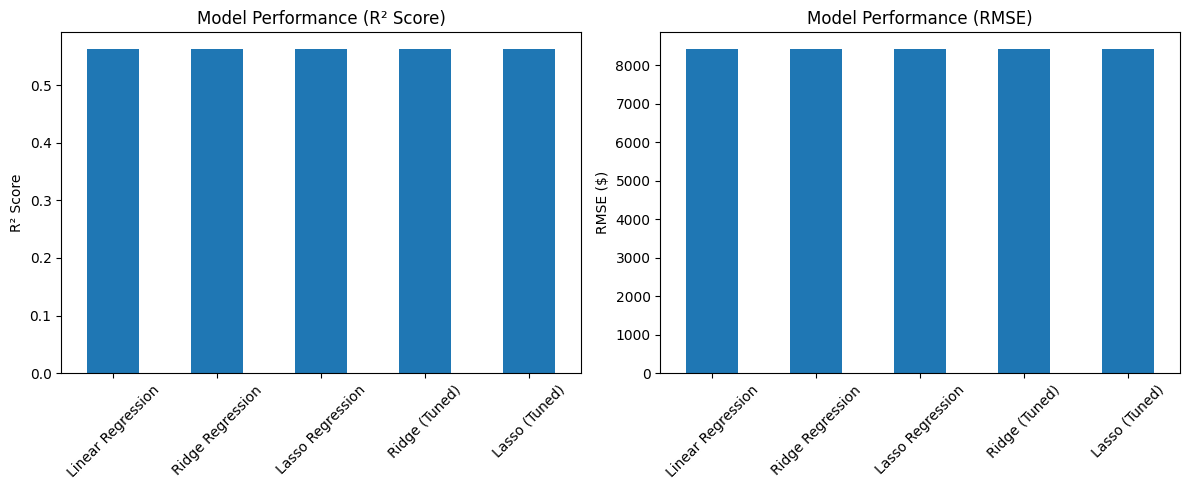

In [27]:
# The models look nearly identical, indicating we may not need regularization for this but let's look at the results in more detail
# create comparison DataFrame
results_df = pd.DataFrame(results).T
print("Model Performance Summary:")
print(results_df.round(3))

# plot comparison
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# r2 comparison
test_r2_data = results_df['Test R²'].dropna()
test_r2_data.plot(kind='bar', ax=axes[0])
axes[0].set_title('Model Performance (R² Score)')
axes[0].set_ylabel('R² Score')
axes[0].tick_params(axis='x', rotation=45)

# RMSE comparison
test_rmse_data = results_df['Test RMSE'].dropna()
test_rmse_data.plot(kind='bar', ax=axes[1])
axes[1].set_title('Model Performance (RMSE)')
axes[1].set_ylabel('RMSE ($)')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [30]:
# Find best model
best_model_name = results_df['Test R²'].idxmax()
best_r2 = results_df['Test R²'].max()

print(f"Best model: {best_model_name}")
print(f"Best R² score: {best_r2:.3f}")

# Get the best model object
if 'Ridge' in best_model_name:
    best_model = best_ridge
    best_predictions = y_test_pred_ridge
elif 'Lasso' in best_model_name:
    best_model = best_lasso
    best_predictions = y_test_pred_lasso
else:
    # Use Linear Regression
    lr = LinearRegression()
    lr.fit(X_train_scaled, y_train)
    best_model = lr
    best_predictions = lr.predict(X_test_scaled)

# Feature coefficients
feature_importance = pd.DataFrame({
    'feature': X_encoded.columns,
    'coefficient': best_model.coef_
})
feature_importance['abs_coefficient'] = abs(feature_importance['coefficient'])
feature_importance = feature_importance.sort_values('abs_coefficient', ascending=False)

print(f"\nTop 20 Most Important Features:")
print(feature_importance.head(20))

Best model: Ridge Regression
Best R² score: 0.563

Top 20 Most Important Features:
                         feature   coefficient  abs_coefficient
38            manufacturer_tesla  11921.097137     11921.097137
33          manufacturer_porsche  10170.106634     10170.106634
12             manufacturer_fiat  -9369.697436      9369.697436
58                    type_truck   8337.924694      8337.924694
55                   type_pickup   7039.705331      7039.705331
21              manufacturer_kia  -6964.044016      6964.044016
17          manufacturer_hyundai  -6519.247173      6519.247173
29       manufacturer_mitsubishi  -6009.174677      6009.174677
40       manufacturer_volkswagen  -5646.310288      5646.310288
53                  type_offroad   5642.764422      5642.764422
35            manufacturer_rover   5584.298041      5584.298041
31           manufacturer_nissan  -5498.940015      5498.940015
0                           year   5112.777915      5112.777915
25            manufac

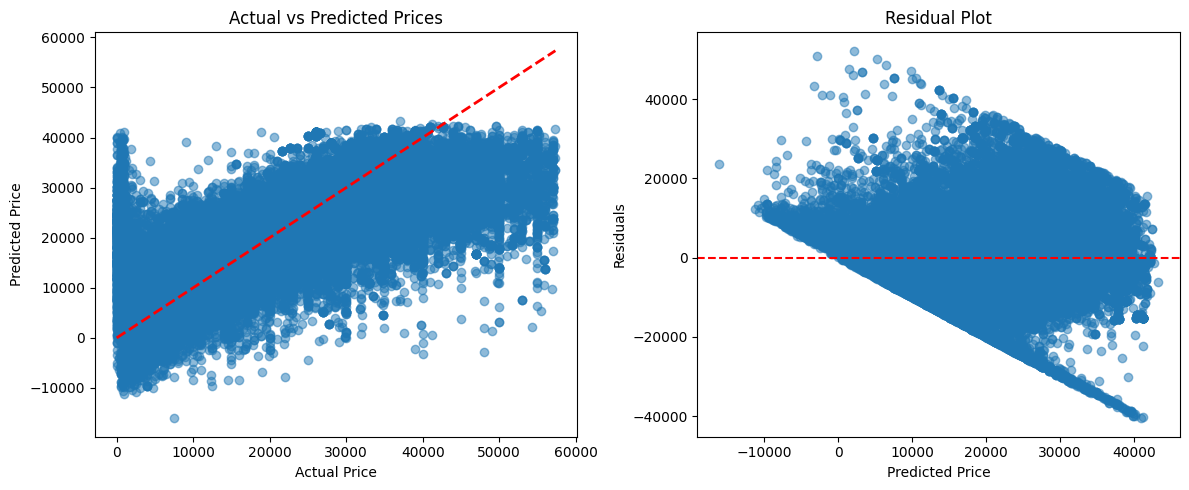

In [31]:
# Residual analysis
residuals = y_test - best_predictions

# Plot actual vs predicted
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, best_predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')

plt.subplot(1, 2, 2)
plt.scatter(best_predictions, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.tight_layout()
plt.show()

Looks like all models performed the same. This could be due to dealing with highly cleaned data with a clean linear relationship or it could be due to overcleaning in some areas. I'm unable to model with more features, as Google Colab keeps crashing; remodeling with better resources would be a good idea before moving to production.

That said, the Ridge Regression model did perform marginally better, and requires less training time than the Lasso model.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

Based on the model analysis, here are some key business insights and recommendations for your used car dealership:

### Key Price Factors:

The coefficients from the Ridge Regression model indicate the impact of each feature on the predicted price. A positive coefficient suggests that as the feature increases (or is present, in the case of one-hot encoded categorical features), the price tends to increase. A negative coefficient suggests the opposite.

#### Positive Price Factors:
* **Manufacturer**: Certain manufacturers command higher prices. As seen in the feature importance, Tesla and Porsche have the largest positive coefficients, indicating a significant positive impact on price. Other manufacturers with notable positive coefficients include alfa-romeo and aston-martin.

* **Year**: Newer cars tend to be more expensive. The positive coefficient for year confirms this expected relationship.
Car Type: Certain car types are associated with higher prices. Trucks and pickups have significant positive coefficients, suggesting they are generally more expensive. Offroad vehicles also show a positive price factor.

#### Negative Price Factors:
* **Odometer**: Higher mileage leads to lower prices. The negative coefficient for odometer aligns with this expectation.

* **Manufacturer**: Some manufacturers are associated with lower prices compared to the baseline. Fiat, Kia, Hyundai, Mitsubishi, Volkswagen, Mazda, Chrysler, and Harley-Davidson show notable negative coefficients.

* **Car Type**: Hatchbacks have a notable negative coefficient.

#### Other Factors:
* **Car Type**: As mentioned above, trucks, pickups, and offroad vehicles tend to have higher prices, while hatchbacks tend to have lower prices. The model considers other types as well, with varying impacts.

* **Condition**: Similarly, the coefficients for the conditions 'excellent' and 'like new' have positive impacts, while 'fair' and 'salvage' have negative impacts.

### Dealer Recommendations:

Based on these findings, here are some recommendations for your used car dealership:

* **Prioritize Newer, Lower-Mileage Inventory**: The strong positive correlation between year and price, and the strong negative correlation between odometer and price, highlight the importance of stocking newer cars with lower mileage to maximize potential profit.

* **Focus on High-Value Manufacturers and Types**: Given the positive coefficients for manufacturers like Tesla and Porsche, and vehicle types like trucks, pickups, and offroad vehicles, consider prioritizing the acquisition and stocking of these vehicles if they align with your market and customer base.

* **Be Strategic with Lower-Value Inventory**: For manufacturers and types with negative price factors (e.g., Fiat, Kia, hatchbacks), strategize on competitive pricing or consider stocking fewer of these models unless there is high local demand.

* **Highlight Condition**: Emphasize the condition of the vehicles, as better conditions are likely to command higher prices. Ensure your descriptions accurately reflect the vehicle's condition and consider detailing or reconditioning cars to improve their perceived condition.

* **Consider Market Demand for Specific Models**: While manufacturers and types are strong indicators, the model feature also had a large number of unique values, suggesting that specific models within a manufacturer or type can significantly influence price. Further analysis into popular and high-value specific models in your region could be beneficial.

These insights can help you make more informed decisions about purchasing inventory, pricing cars, and highlighting features that are most valued by customers in your market.